In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [2]:
df = pd.read_csv(r"Downloads\train.csv")

In [3]:
df.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
df.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
df.shape

(1460, 81)

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
#df.drop_index()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
#check for null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
# fill the null values
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage']).mean()

In [12]:
df =df.rename(columns = {'LotFrontage':'age'})

In [13]:
df['age'].mean()

70.04995836802556

# explore the data

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,4.216100e+02,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.0,56.897260,4.230057e+01,20.000000,20.000000,50.000000,70.000000,190.000000
age,1460.0,70.049958,1.094611e-12,70.049958,70.049958,70.049958,70.049958,70.049958
LotArea,1460.0,10516.828082,9.981265e+03,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.0,6.099315,1.382997e+00,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.0,5.575342,1.112799e+00,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.0,1971.267808,3.020290e+01,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.0,1984.865753,2.064541e+01,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.0,103.685262,1.810662e+02,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.0,443.639726,4.560981e+02,0.000000,0.000000,383.500000,712.250000,5644.000000


In [15]:
# choise the important feature for correlation
important_features = ['SalePrice', 'MoSold','MSSubClass','LotArea','OverallQual','BedroomAbvGr','BsmtUnfSF','KitchenAbvGr','TotalBsmtSF','WoodDeckSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath']

In [16]:
correlation = df[important_features].corr()
print(correlation['SalePrice'].sort_values(ascending= True))

KitchenAbvGr   -0.135907
MSSubClass     -0.084284
BsmtHalfBath   -0.016844
MoSold          0.046432
BedroomAbvGr    0.168213
BsmtUnfSF       0.214479
BsmtFullBath    0.227122
LotArea         0.263843
HalfBath        0.284108
WoodDeckSF      0.324413
FullBath        0.560664
TotalBsmtSF     0.613581
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64


<AxesSubplot:>

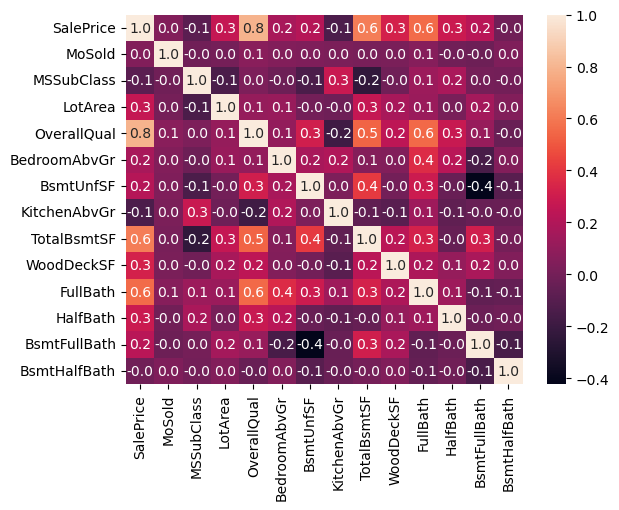

In [17]:
sns.heatmap(correlation,annot = True ,fmt = '.01f')

In [18]:
# prepare the data and target 
X = df[important_features].drop(['SalePrice'],axis = 1)
y = df[('SalePrice')]
normalization = StandardScaler()
normalization.fit_transform(X)

array([[-1.5991111 ,  0.07337496, -0.20714171, ...,  1.22758538,
         1.10781015, -0.24106104],
       [-0.48911005, -0.87256276, -0.09188637, ..., -0.76162067,
        -0.81996437,  3.94880935],
       [ 0.99089135,  0.07337496,  0.07347998, ...,  1.22758538,
         1.10781015, -0.24106104],
       ...,
       [-0.48911005,  0.30985939, -0.14781027, ..., -0.76162067,
        -0.81996437, -0.24106104],
       [-0.8591104 , -0.87256276, -0.08016039, ..., -0.76162067,
         1.10781015, -0.24106104],
       [-0.1191097 , -0.87256276, -0.05811155, ...,  1.22758538,
         1.10781015, -0.24106104]])

#  split the data for training and testing

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.2 , random_state = 42)

# Training the Model (Linear Regression)

In [20]:
# initialize the model
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [21]:
# accuracy 
print('accuracy ',linear_model.score(X_test,y_test))

accuracy  0.7612707744125982


In [22]:
# make prediction
y_pred = linear_model.predict(X_test)
print(y_pred[:5])

[159759.22678825 288657.63160088 109961.3297937  168889.01143659
 310649.42217614]


In [23]:
# evaluate the model
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

print('mean_squared_error',mse)
print('mean_absolute_error',mae)

mean_squared_error 1831131035.444536
mean_absolute_error 27002.227856118225


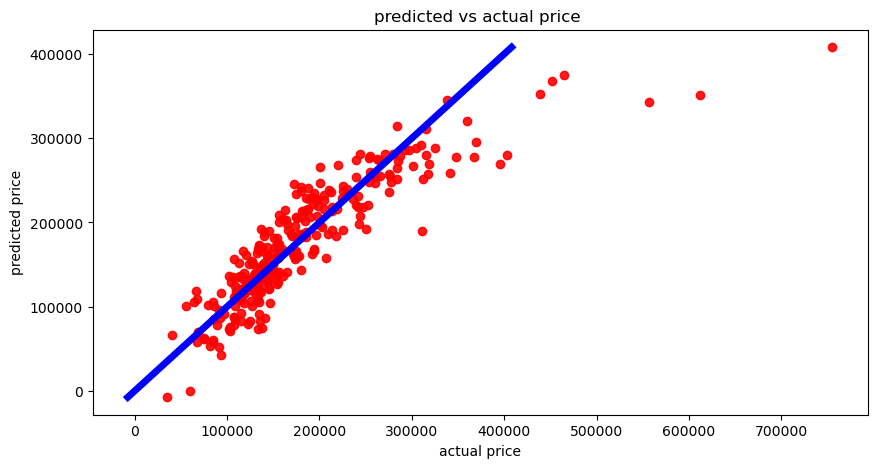

In [24]:
# plotting predicted and actual prices
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred , color='red' , alpha = .9)
plt.plot([min(y_pred),max(y_pred)],[min(y_pred),max(y_pred)] ,color= 'blue',linewidth = 5)
plt.title('predicted vs actual price ')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

# Random Forest Model 

In [25]:
RFM_model = RandomForestRegressor(n_estimators = 10)

In [26]:
RFM_model.fit(X_train , y_train)

RandomForestRegressor(n_estimators=10)

In [27]:
# make prediction
y_pred = RFM_model.predict(X_test)
print(y_pred[:10])

[137370.  293361.7 117340.  140670.  357882.6  87050.  214040.  155095.
  91350.  130628.7]


In [28]:
print('accuracy' , RFM_model.score(X_test , y_test)*100)

accuracy 86.03883226353604


In [29]:
# evaluate the model
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

print('mean_squared_error',mse)
print('mean_absolute_error',mae)

mean_squared_error 1070867107.7193493
mean_absolute_error 22072.43801369863


In [30]:
import joblib

# Save the RandomForestRegressor model
joblib.dump(RFM_model, 'model.pkl')
RFM_model = joblib.load('model.pkl')

In [31]:
import streamlit as st
import pandas as pd

# Function to predict house prices
def predict_price(features):
    # Preprocess the features if necessary
    # Make predictions using the loaded model
    prediction = RFM_model.predict(features)
    return prediction

# Streamlit App
st.title('House Price Prediction')

# Input fields for user input
num_bedrooms = st.number_input('Number of Bedrooms', min_value=1, max_value=10, value=3)
square_feet = st.number_input('Square Feet', min_value=100, max_value=10000, value=1500)
# Add more input fields as needed

# Predict button
if st.button('Predict Price'):
    # Collect user input into a DataFrame
    features = pd.DataFrame({
        'num_bedrooms': [num_bedrooms],
        'square_feet': [square_feet]
        # Add more feature columns as needed
    })

    # Make prediction
    prediction = predict_price(features)
    st.write(f'Predicted Price: ${prediction[0][0]}')


2024-05-07 08:16:09.018 
  command:

    streamlit run C:\Users\Elhamd Pc\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-05-07 08:16:09.019 Session state does not function when running a script without `streamlit run`
